# 线性回归

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 内嵌画图，直接在输出画图
%matplotlib inline
data = pd.read_csv("data/实验报告数据/data_regression.csv")
# # 对特征进行归一化
data = (data-data.min())/(data.max()-data.min())
data.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Lable
0,0.000000,0.580926,0.716085,0.560842,0.563289,0.450946,0.802762,0.777186,0.487578,0.813906
1,0.001001,0.489895,0.725699,0.793096,0.521171,0.332409,0.476819,0.492730,0.467490,0.535775
2,0.002002,0.547378,0.454809,0.532910,0.731531,0.449368,0.282618,0.751812,0.077184,0.306897
3,0.003003,0.747929,0.544565,0.353476,0.533109,0.594280,0.790259,0.346485,0.622570,0.620676
4,0.004004,0.727106,0.319965,0.592861,0.563628,0.467610,0.434912,0.412091,0.610174,0.439704


In [27]:
# 分割数据,分为训练集,测试集
from sklearn.model_selection import train_test_split

X = data.iloc[:,[1,2,3,4,5,6,7,8]]


Y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=0)

In [28]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,0.580926,0.716085,0.560842,0.563289,0.450946,0.802762,0.777186,0.487578
1,0.489895,0.725699,0.793096,0.521171,0.332409,0.476819,0.492730,0.467490
2,0.547378,0.454809,0.532910,0.731531,0.449368,0.282618,0.751812,0.077184
3,0.747929,0.544565,0.353476,0.533109,0.594280,0.790259,0.346485,0.622570
4,0.727106,0.319965,0.592861,0.563628,0.467610,0.434912,0.412091,0.610174


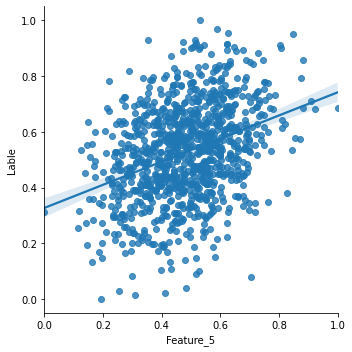

In [29]:
# 绘制训练集散点图
sns.lmplot(x = 'Feature_5',y = 'Lable',data = data)
plt.show()

In [30]:
# 导入sklearn的线性回归模型/
from sklearn.linear_model import LinearRegression
line = LinearRegression()
# 训练模型
lin = line.fit(x_train,y_train)

In [31]:
# 获取预测值
Y_pre = lin.predict(x_test)

In [32]:
# 计算MSE值
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,Y_pre)
print("MSE值为:%s" % MSE)

MSE值为:2.1657891629410286e-06


# KNN

In [55]:
import pandas as pd
import numpy as np
# 导入模型,训练KNN模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import minmax_scale

In [69]:
# 导入数据
data = pd.read_csv("data/实验报告数据/data_regression.csv")
# 标准化
data=(data - data.mean()) / (data.std())
# data = pd.DataFrame(minmax_scale(data))
data.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Lable
0,-1.729454,0.293068,1.174219,-0.100560,0.310209,-0.203658,1.574810,1.558834,-0.180862,1.657821
1,-1.725992,-0.341470,1.233028,1.381728,0.057387,-1.015913,-0.229175,-0.340634,-0.307417,0.056336
2,-1.722530,0.059219,-0.424103,-0.278824,1.320111,-0.214469,-1.304012,1.389404,-2.766366,-1.261553
3,-1.719067,1.457168,0.124966,-1.424006,0.129049,0.778515,1.505606,-1.317193,0.669592,0.545196
4,-1.715605,1.312019,-1.248995,0.103792,0.312245,-0.089470,-0.461118,-0.879108,0.591495,-0.496846


In [70]:
# 分割数据,分为训练集,测试集
# test_size:测试集占比
from sklearn.preprocessing import minmax_scale  #归一化库
from sklearn.model_selection import train_test_split

X = data.iloc[:,[1,2,3,4,5,6,7,8]]

Y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [64]:

# from sklearn.neighbors import KNeighborsRegressor
# # 遍历k,寻找最优k值
# from sklearn.model_selection import cross_val_score
# import matplotlib.pyplot as plt
# # 中文和负号的正常显示
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# K = np.arange(1,np.ceil(np.log2(data.shape[0]))).astype('int').tolist()
# score_list =[]
# for i in K:
#     score = cross_val_score(KNeighborsRegressor(i,weights='distance'),x_train,y_train,cv=10,scoring='neg_mean_squared_error').mean()
#     score_list.append(-1*score)
# plt.figure(figsize=[8,4])

# plt.plot(K,score_list)
# # 最佳K值
# arg_min = np.array(score_list).argmin()
# plt.text(K[arg_min], score_list[arg_min] + 300, '最佳k值为%s' %int(K[arg_min]))
# plt.show()

In [36]:
# 网格搜索寻找最优参数K
from sklearn.model_selection import GridSearchCV
n_neighbors = range(1,10)
tips = {"n_neighbors":n_neighbors}
gr = GridSearchCV(KNeighborsRegressor(),tips).fit(x_train,y_train)
print("最优参数：")
gr.best_params_

最优参数：


{'n_neighbors': 7}

In [71]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
Y_pre = knn.predict(x_test)

In [72]:
# 计算MSE值
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,Y_pre)
print("MSE值为:%s" % MSE)

MSE值为:0.1281965908245418


# 随机森林

In [40]:
import pandas as pd
import numpy as np
# 导入第三方库
from sklearn.ensemble import RandomForestRegressor


In [49]:
data = pd.read_csv("data/实验报告数据/data_regression.csv")
# 特征标准化
data=(data - data.mean()) / (data.std())
# 分割数据,分为训练集,测试集
# test_size:测试集占比
from sklearn.model_selection import train_test_split

X = data.iloc[:,[1,2,3,4,5,6,7,8]]
Y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
# x_test.tail()

In [50]:
# 网格搜索
from sklearn.model_selection import GridSearchCV
n_estimators = range(10,100)
tips = {"n_estimators":n_estimators}
gr = GridSearchCV(RandomForestRegressor(),tips).fit(x_train,y_train)
print("最优参数：")
gr.best_params_

最优参数：


{'n_estimators': 57}

In [51]:

ran = RandomForestRegressor(n_estimators=57,criterion="mse")
ran.fit(x_train,y_train)
Y_pre = ran.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,Y_pre)
print(MSE)

0.1335694038119807


In [18]:
df = pd.DataFrame({"原来":y_test,"预测":Y_pre})
df

,原来,预测
81,-0.497244,-0.384487
18,-2.415368,-1.556101
477,-0.645512,-0.386545
3,0.545196,0.170327
274,0.347705,-0.102034
...,...,...
753,-0.444270,-0.088084
848,-0.183001,-0.267833
562,0.417514,0.092768
94,-1.685796,-0.831145
